# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [5]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [6]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return (x**2) * numpy.sin(x)

Ensure your function works with numpy arrays:

In [7]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [8]:
def g(x):
    '''Analytical integral of f(x).'''
    return (2*x*(numpy.sin(x))-(((x**2)-2)*(numpy.cos(x)))-2)

Check your solution with the same numpy array:

In [9]:
assert g(0) == 0.

In [10]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [11]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax)-g(xmin)

Check your analytic function:

In [12]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [27]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''

    if N%2 ==0:
        N = N
    else:
        N = N+1
    e_sum = 0 
    o_sum = 0
    D = (xmax - xmin) / N
    for i in range (1,N):
        if i%2 != 0:
            o_sum += f(xmin+ (i*D))
        else:
            e_sum += f(xmin + (i*D))
    return (D / 3) * (f(xmin) + f(xmax) + (2* e_sum) + (4* o_sum))
        
    

Make sure you have implemented Simpson's rule correctly:

In [28]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [29]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Variation of Fractional Error as Number of panels changes')

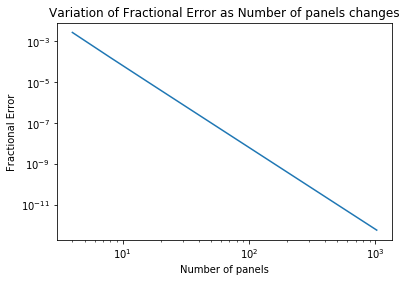

In [41]:
import matplotlib.pyplot as plt
x0, x1 = 0, 2  # Bounds to integrate f(x) over

panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution



z = []
for i in panel_counts:
    fractionalerror = (result_analytic - integrate_numeric(x0, x1, i))/ result_analytic
    z.append(fractionalerror)
plt.loglog(panel_counts, z)
plt.ylabel("Fractional Error")
plt.xlabel("Number of panels")
plt.title("Variation of Fractional Error as Number of panels changes")


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

For Simpsons rule, as can be seen in the data, the error values change with the number of panels N by a relationship of N^(-4), and we can see how the reducing error in the value obtained numerically causes a decrease in the fractional error as N increases. If the number of panels taken becomes too large, the error becomes small enough that the numerical round-off by the computer (due to the the finite precision that numbers can be stored) causes what can appear as a random distribution of points, however this has not affected the data plotted above. 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The error scales with the panel counts N for trapezium rule by a relationship of N^-2, so the error would not be reduced quite as quickly by increasing the panel count however the error would still reduce causing an increase in the accuracy.